# Problem Statement 


An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

# Project Objective 


An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. To this end, we will define the behavior of customers and create groups according to clusters in these behaviors. In other words, we will include those who exhibit common behaviors in the same groups and we will try to develop special sales and marketing techniques for these groups.



# Dataset Information 

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides

# IMPORT LIBRARIES

import data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[10,5]
df=pd.read_csv("OnlineRetail (3).csv",encoding="latin-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data preprocessing:

In [9]:
df.shape


(541909, 8)

In [10]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


DATA TYPE CONVERSION



In [12]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])


In [14]:
df["Customer ID"]=df["CustomerID"].astype("object")

In [20]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


removing negative values

In [28]:
df["Quantity"][df["Quantity"]<0]=0


MISSING VALUES



In [29]:
Missing=df.isnull().sum()[df.isnull().sum()>0]
Missing


Description      1454
CustomerID     135080
Customer ID    135080
dtype: int64

In [30]:

percent_missing=(Missing/df.shape[0])*100
percent_missing

Description     0.268311
CustomerID     24.926694
Customer ID    24.926694
dtype: float64

0% 22% OF MISSING VALUES SO DROP ROWS



In [33]:
df=df.dropna(subset=["Description","Customer ID"],axis=0)


In [34]:
df.shape


(406829, 9)

In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Customer ID    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Customer ID  406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


# ANALYSIS


# NUMERICAL COLUMNS



In [37]:
num_features=df.select_dtypes(include="number")
num_features.columns

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

# CATEGORICAL COLUMNS


In [38]:
cat_features=df.select_dtypes(exclude="number")
cat_features.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country',
       'Customer ID'],
      dtype='object')

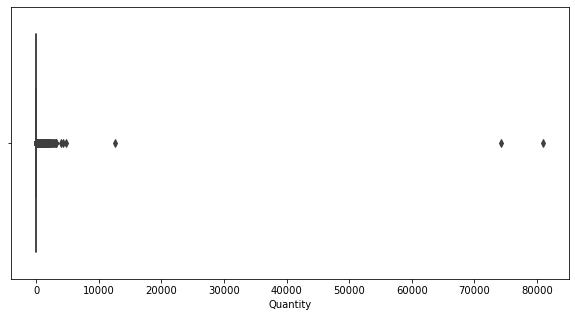

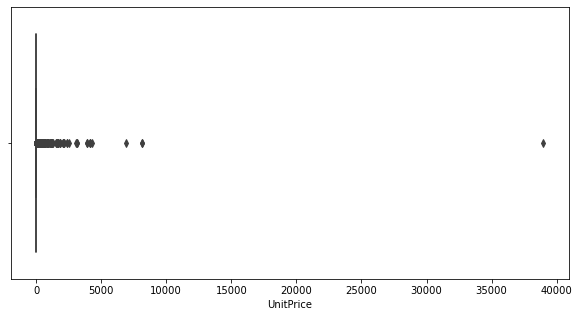

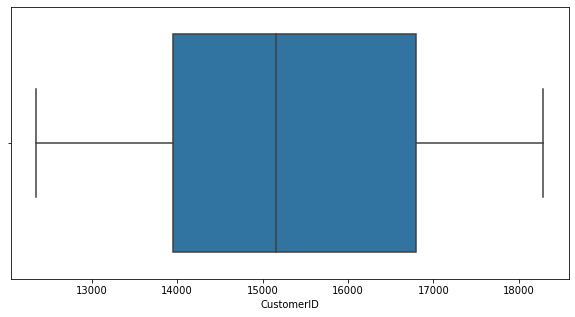

In [39]:
for i in num_features.columns:
    sns.boxplot(df[i])
    plt.show()

# Monetary Value: How much money a customer spends on purchases.
# so it is based on amount so multipluing price and quantity

In [41]:
df["Amount"]=df["UnitPrice"]*df["Quantity"]


In [44]:
df["Amount"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Amount, Length: 406829, dtype: float64

In [45]:
monetary=df.groupby(["Customer ID"])["Amount"].sum()


In [46]:
monetary

Customer ID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Amount, Length: 4372, dtype: float64

# Frequency: How often a customer makes a purchase.

In [47]:
frequency=df.groupby(["Customer ID"])["Description"].count()


In [48]:
frequency

Customer ID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: Description, Length: 4372, dtype: int64

# Combine monetary ,frequency with customer id


In [49]:
df1=pd.merge(monetary,frequency,how="inner",on="Customer ID")
df1=df1.reset_index()
df1.columns=["Customer ID","Monetary","Frequency"]
df1.head()

,Customer ID,Monetary,Frequency
0,12346.0,77183.60,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


# Recency: How recently a customer has made a purchase.


In [50]:
recency=df[["Customer ID","InvoiceDate"]]
recency

,Customer ID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00
...,...,...
541904,12680.0,2011-12-09 12:50:00
541905,12680.0,2011-12-09 12:50:00
541906,12680.0,2011-12-09 12:50:00
541907,12680.0,2011-12-09 12:50:00


# Recency


In [51]:
maximum=recency["InvoiceDate"].max()
maximum

Timestamp('2011-12-09 12:50:00')

In [52]:
maximum=maximum+pd.DateOffset(days=1)
maximum

Timestamp('2011-12-10 12:50:00')

In [53]:
recency['diff']=maximum-recency.InvoiceDate
recency.head()

,Customer ID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [54]:
df2=pd.DataFrame(recency.groupby("Customer ID")["diff"].min())
df2=df2.reset_index()
df2.columns=["Customer ID","Recency"]
df2.head()

,Customer ID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


# RFM


In [55]:
RFM=pd.merge(df1,df2,how="inner",on="Customer ID")
RFM

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77183.60,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,278 days 02:58:00
4368,18281.0,80.82,7,181 days 01:57:00
4369,18282.0,178.05,13,8 days 01:07:00
4370,18283.0,2094.88,756,4 days 00:48:00


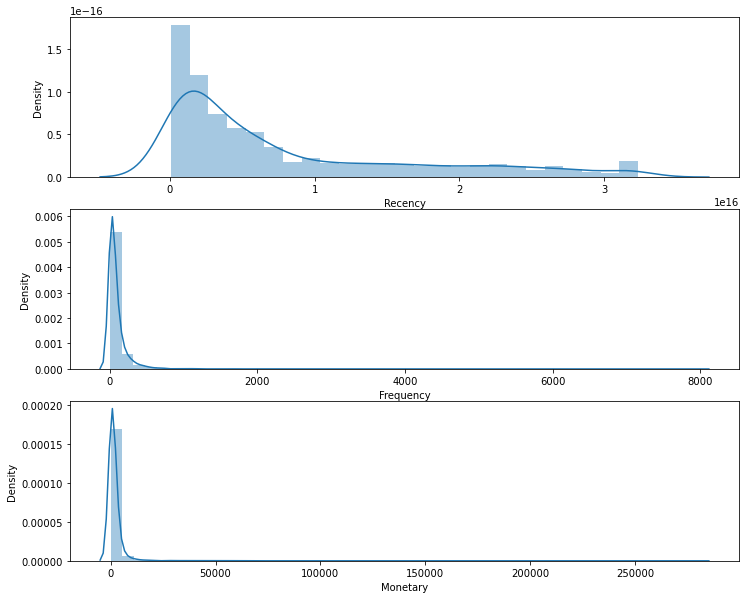

In [56]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'])
# Show the plot
plt.show()

In [57]:
RFM.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer ID  4372 non-null   float64        
 1   Monetary     4372 non-null   float64        
 2   Frequency    4372 non-null   int64          
 3   Recency      4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [58]:
RFM['Recency'] = RFM['Recency']/np.timedelta64(1,'D')


In [59]:
RFM.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4372 non-null   float64
 1   Monetary     4372 non-null   float64
 2   Frequency    4372 non-null   int64  
 3   Recency      4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 170.8 KB


OUTLIER TREATMENT

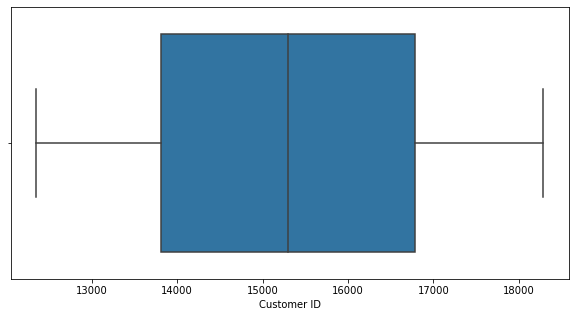

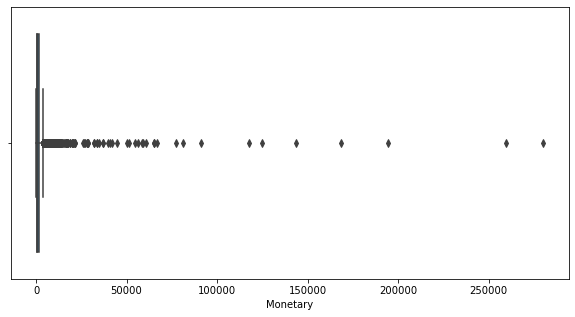

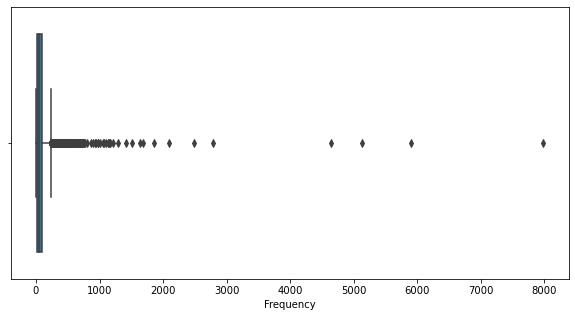

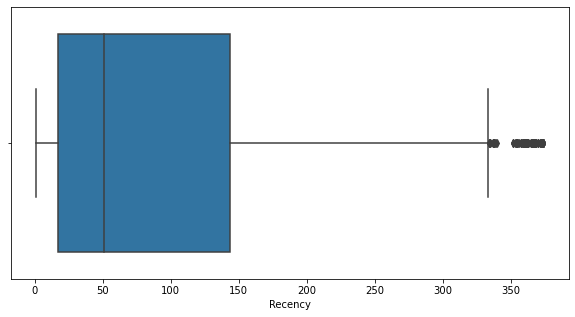

In [60]:
for i in RFM.columns:
    sns.boxplot(RFM[i])
    plt.show()

In [61]:
for i in RFM .columns.drop(["Customer ID"]):
    q1=RFM [i].quantile(0.25)
    q3=RFM [i].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    RFM=RFM[(RFM[i]>ll)&(RFM [i]<ul)] 


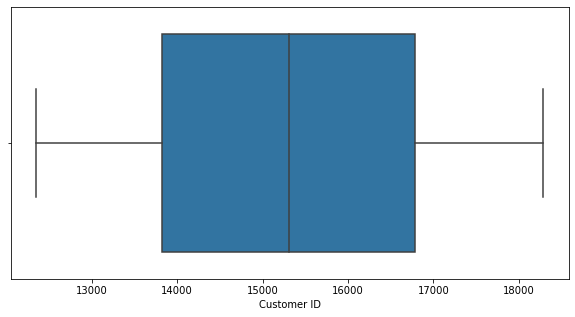

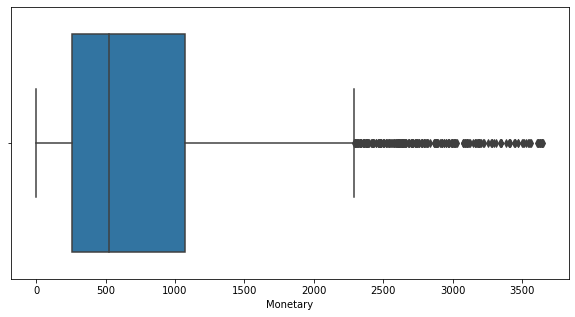

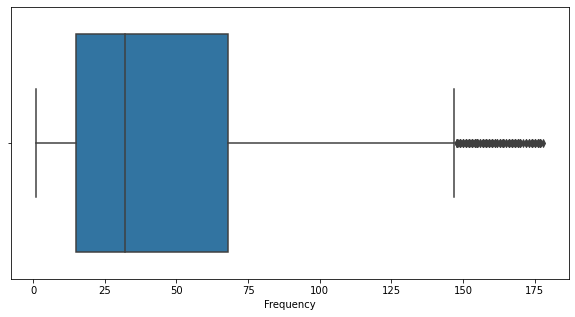

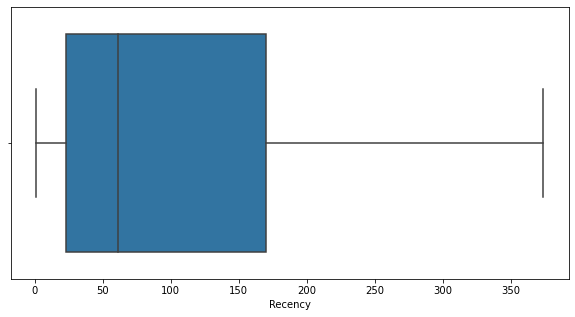

In [62]:
for i in RFM.columns:
    sns.boxplot(RFM[i])
    plt.show()

# Model Building AND Model Evaluation


FOR CLUSTERING Scaling IS IMPORTANT


In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [64]:
df_std=pd.DataFrame(ss.fit_transform(RFM),columns=RFM.columns)
df_std

,Customer ID,Monetary,Frequency,Recency
0,-1.723243,1.337749,-0.376369,-0.277364
1,-1.722661,1.284914,0.631999,-0.825524
2,-1.722079,-0.609557,-0.712492,1.987043
3,-1.720915,2.281290,1.160191,-0.653909
4,-1.720333,-0.936229,-1.024605,0.964434
...,...,...,...,...
3687,1.728468,-0.823211,-0.904562,-0.296143
3688,1.729632,-0.814292,-0.880553,1.671375
3689,1.730214,-0.947118,-0.952579,0.735832
3690,1.730796,-0.817687,-0.808527,-0.932320


In [65]:
df_std.drop(["Customer ID"],axis=1,inplace=True)


# Kmeans clustering


In [66]:
from sklearn.cluster import  KMeans
k_neighbors=np.arange(1,15)
kmeans_clusters=[]



In [67]:
for i in k_neighbors:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_std)
  kmeans_clusters.append(kmeans.inertia_)
kmeans_clusters

[11075.999999999998,
 6171.859657239348,
 3733.1252009673312,
 2918.689941738568,
 2484.986556508613,
 2167.246992367838,
 1926.3319881608256,
 1748.0475556599738,
 1589.7163890010656,
 1483.3242790223767,
 1381.5576450341405,
 1292.618841875418,
 1207.2585652705382,
 1149.8573508668003]

ELBOW PLOT OF N_CLUSTERS VS INERTIA

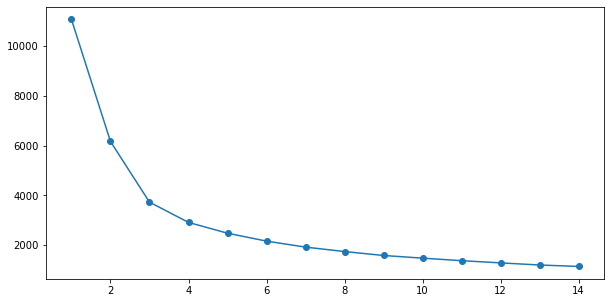

In [68]:
plt.plot(k_neighbors,kmeans_clusters,marker="o")
plt.show()

n_clusters=3


In [69]:
kmeans=KMeans(n_clusters=3,random_state=10)
kmeans.fit(df_std)

KMeans(n_clusters=3, random_state=10)

In [70]:
predict=kmeans.predict(df_std)


In [71]:
df_kmeans=df_std.copy(deep=True)


In [72]:
df_kmeans.head()

,Monetary,Frequency,Recency
0,1.337749,-0.376369,-0.277364
1,1.284914,0.631999,-0.825524
2,-0.609557,-0.712492,1.987043
3,2.281290,1.160191,-0.653909
4,-0.936229,-1.024605,0.964434


In [73]:
df_kmeans["Labels"]=predict


In [74]:
df_kmeans.head()

,Monetary,Frequency,Recency,Labels
0,1.337749,-0.376369,-0.277364,0
1,1.284914,0.631999,-0.825524,1
2,-0.609557,-0.712492,1.987043,2
3,2.281290,1.160191,-0.653909,1
4,-0.936229,-1.024605,0.964434,2


In [75]:
kmeans.inertia_


3733.1252009673312

In [78]:
from sklearn import metrics
metrics.silhouette_score(df_std,df_kmeans.Labels)

0.4399801970751013

# Choosing the Algorithms for the Project


Reasons for choosing kmeans are:

1.its an unsupervised learning .

2.it is an e-commerce  domain.



# Assumptions


The following assumptions were made in order to create the kmeans model for project.

1.we dont have one specific outcome variable

2.RFM(recency, frequency, monetary) for Segment the customers based on their purchasing behavior.

3.hope outliers doesn't effect model




# Model Evaluation and Technique


The following techniques were involved in the evaluation of the model.

1.silhouette_score

The value of Mean Squared Error for each model is nearly zero it means the model performs better.

1.The value of the silhouette coefﬁcient is between [-1,1]  ,The worst value is -1. The score we got is 0.4399801970751013 which near to best.

# Inferences from the Project

In [83]:
# Recency: How recently a customer has made a purchase. 
# Frequency: How often a customer makes a purchase. 
# Monetary Value: How much money a customer spends on purchases.


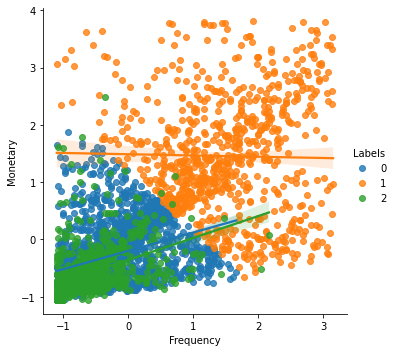

In [79]:
sns.lmplot(x='Frequency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

Inferecnce:

Customer whose frequency is high is often spending more money in purchasing the products

Customer whose frequency is less is spending less money in purchasing the products.

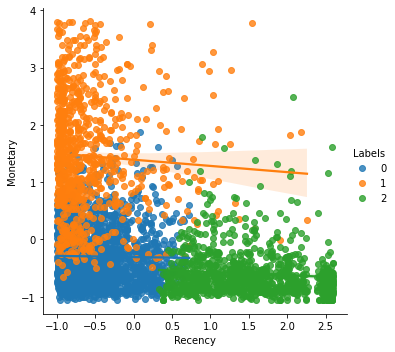

In [80]:
sns.lmplot(x='Recency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

Inferecnce:
    
Recent customers is spending less money in purchasing the products.

Customers who purchased back is spending money in less,medium and high level



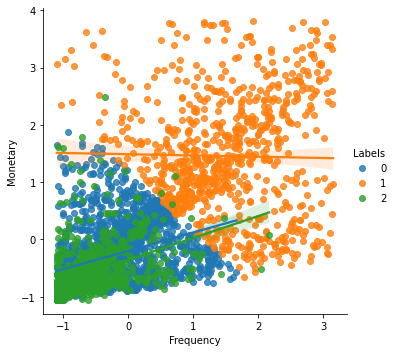

In [82]:
sns.lmplot(x='Frequency', y='Monetary', hue='Labels', data=df_kmeans)
plt.show()

Inference:
    
Orange(1) is high level customers

Blue(0) is low level customers

Green(2) is medium level customers

# Conclusion


The future possibilities of retail store can understand the various customer purchase patterns for their
firm by above model and above Inferecnce